# Boosting

The dataset can be found in the link - https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Alternatively, you can download the dataset from the same segment on upGrad platform 

In [11]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [12]:
# read in the data and display the first 5 rows:
data = pd.read_csv('hmeq-preprocessed.csv')
display(data.head())

,bad_loan,loan_request,amt_due_on_mort,value_of_property,years_at_job,num_derog_reports,num_delinq_lines,oldest_cl_age,num_recent_cl,num_of_cl,debt_to_inc_ratio,reason_for_loan_DebtCon,reason_for_loan_HomeImp,occupation_Mgr,occupation_Office,occupation_Other,occupation_ProfExe,occupation_Sales,occupation_Self
0,1.0,-1.563111,-1.092273,-1.119977,0.204896,-0.287802,-0.390777,-1.010801,-0.105982,-1.245799,0.100426,0,1,0,0,1,0,0,0
1,1.0,-1.545527,-0.083958,-0.611919,-0.263303,-0.287802,1.444855,-0.689082,-0.693180,-0.749574,0.100426,0,1,0,0,1,0,0,0
2,1.0,-1.527943,-1.374281,-1.506102,-0.664616,-0.287802,-0.390777,-0.365411,-0.105982,-1.146554,0.100426,0,1,0,0,1,0,0,0
3,0.0,-1.510359,0.549123,0.142169,-0.798387,-0.287802,-0.390777,-1.022905,-0.693180,-0.749574,0.100426,0,1,0,1,0,0,0,0
4,1.0,-1.510359,-0.985310,-1.097579,0.004239,-0.287802,-0.390777,-0.927646,-0.105982,-1.345045,0.362816,0,1,0,0,1,0,0,0


### 1. Get the distribution of the target variable using countplot: `bad_loan`

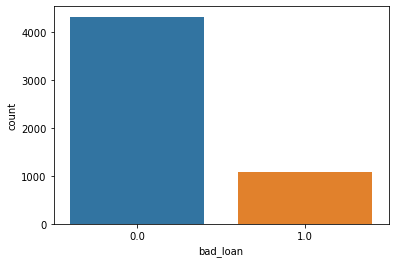

In [13]:
sns.countplot(x='bad_loan', data=data)
plt.show()

In [14]:
# separate target variable from features
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

print(data.shape)
print(X.shape)
print(y.shape)

# partition data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42
                                                    )

(5402, 19)
(5402, 18)
(5402,)


### 2. Compute the baseline classification accuracy for `X_train`?
> - HINT: The [DummyClassifier](#https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) may be helpful.
> - Use the `most_frequent` strategy of calculating the baseline accuracy

In [5]:
#Import Dummy Classifier
from sklearn.dummy import DummyClassifier

In [17]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)


### For verifying answer:
print("Baseline Accuracy = ", baseline_acc)

DummyClassifier(strategy='most_frequent')
Baseline Accuracy =  0.7988895743368292


In [7]:
def create_bootstrap_sample(df):
    return df.sample(n= df.shape[0], replace = True)

bootstrap_sample = create_bootstrap_sample(X_train)

print('Number of rows should be the same:')
print('Number of rows in X_train:  ', X_train.shape[0])
print('Number of rows in bootstrap:', create_bootstrap_sample(X_train).shape[0])

print(bootstrap_sample)

Number of rows should be the same:
Number of rows in X_train:   3781
Number of rows in bootstrap: 3781
      loan_request  amt_due_on_mort  value_of_property  years_at_job  \
5055      1.610805         3.016053           2.827104     -0.932158   
4510      0.670060        -0.891080          -0.618837      0.673095   
4167      0.476635         0.451469           0.578727     -0.263303   
365      -1.061967        -0.047155          -0.066883     -1.199700   
3618      0.186499        -0.724020          -0.636133     -0.263303   
...            ...              ...                ...           ...   
5012      1.461341         1.573865           1.600794      1.609493   
380      -1.044383         0.003200           0.138381     -1.199700   
5256      2.736182        -0.678387          -0.774498      0.405553   
3131     -0.042093         0.969579           0.777298     -1.065929   
5384      5.426538        -1.309551           0.096682      2.545890   

      num_derog_reports  num_del

## Boosting
> "Boosting is one of the most powerful learning ideas introduced in the last twenty years."

Boosting is fundamentally different than bagging. Bagging ensembles attempt to reduce overall _variance_ by fitting models independently on bootstapped samples. Boosting methods attempt to reduce _bias_ by sequentially improving the overall predictions. That is, base learner $m$ attempts to correct the predictions produced by the base learner $m-1$, for $m=1$ to $M$.

In [8]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)

In [9]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_est = DecisionTreeClassifier (max_depth =2)
ada_boost1 = AdaBoostClassifier(base_est, n_estimators=500, random_state=42, learning_rate=.05)
ada_boost1.fit(X_train, y_train)
ada_boost2 = AdaBoostClassifier(base_est, n_estimators=20, random_state=42, learning_rate=.5)
ada_boost2.fit(X_train, y_train)
res1 = round(recall_score(y_test, ada_boost1.predict(X_test)),4)
res2 = round(recall_score(y_test, ada_boost2.predict(X_test)),4)

print('Winning Model:\t {}, MODEL 1')
print('MODEL 1 Recall:\t {}'.format(res1))
print('MODEL 2 Recall:\t {}:'.format(res2))

Winning Model:	 {}, MODEL 1
MODEL 1 Recall:	 0.6933
MODEL 2 Recall:	 0.6411:


In [10]:
#Gradient Boosted Trees (GBT)
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
recall_gbc = round(recall_score(y_test, gbc_pred),4)
precision_gbc = round(precision_score(y_test, gbc_pred),4)

print('Recall :\t {}'.format(recall_gbc))
print('Precision :\t {}:'.format(precision_gbc))

Recall :	 0.6595
Precision :	 0.8333:


# Feature Selection

In [19]:
feature_importance = rf

NameError: name 'rf_model' is not defined